In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_complete = ride_data.reset_index().merge(city_data, on='city', how="left").set_index('index')
pyber_data_complete.index.name = None

#Display the data table for preview
pyber_data_complete.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

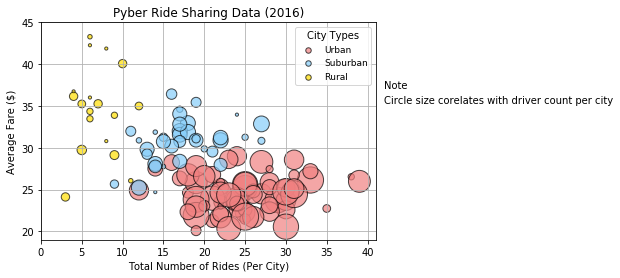

In [3]:
# Obtain the x and y coordinates for each of the three city types

## Urban, group by city --------------------
pyber_urban = pyber_data_complete.loc[pyber_data_complete['type'] == 'Urban']
pyber_urban_by_city = pyber_urban.groupby(['city'])

## x, y axis
x_urban = pyber_urban_by_city['date'].count()
y_urban = pyber_urban_by_city['fare'].mean()

## size - convert Arrary to Series
size_urban = pd.Series(map(lambda x: x[0], pyber_urban_by_city['driver_count'].unique()))

## Suburban, group by city ---------------------
pyber_suburban = pyber_data_complete.loc[pyber_data_complete['type'] == 'Suburban']
pyber_suburban_by_city = pyber_suburban.groupby(['city'])

## x, y axis
x_suburban = pyber_suburban_by_city['date'].count()
y_suburban = pyber_suburban_by_city['fare'].mean()

## size - convert Arrary to Series
size_suburban = pd.Series(map(lambda x: x[0], pyber_suburban_by_city['driver_count'].unique()))

## Rural, group by city ---------------------
pyber_rural = pyber_data_complete.loc[pyber_data_complete['type'] == 'Rural']
pyber_rural_by_city = pyber_rural.groupby(['city'])

## x, y axis
x_rural = pyber_rural_by_city['date'].count()
y_rural = pyber_rural_by_city['fare'].mean()

## size - convert Arrary to Series
size_rural = pd.Series(map(lambda x: x[0], pyber_rural_by_city['driver_count'].unique()))

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=size_urban*10, marker="o", facecolors="#F08080", edgecolors="black", linewidth=1, alpha=0.7, label='Urban')
plt.scatter(x_suburban, y_suburban, s=size_suburban*10, marker="o", facecolors="#87CEFA", edgecolors="black", linewidth=1, alpha=0.7, label='Suburban')
plt.scatter(x_rural, y_rural, s=size_rural*10, marker="o", facecolors="#FFDF00", edgecolors="black", linewidth=1, alpha=0.7, label='Rural')

# Incorporate the other graph properties
plt.xlim(0, 41)
plt.ylim(19, 45)
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(loc='upper right', frameon=True, scatterpoints=1, title='City Types', fontsize=9)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a tetxt label regarding circle size
plt.gcf().text(0.92, 0.65, 'Note', fontsize=10)
plt.gcf().text(0.92, 0.6, 'Circle size corelates with driver count per city', fontsize=10)

# Save Figure
plt.savefig("images/PyberBubblePlot.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

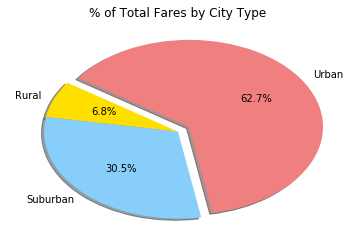

In [14]:
# Calculate Type Percents
fares_urban = pyber_urban['fare'].sum()
fares_suburban = pyber_suburban['fare'].sum()
fares_rural = pyber_rural['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [fares_urban, fares_rural, fares_suburban]
colors = ["#F08080", "#FFDF00", "#87CEFA"]
explode = (0.1, 0, 0)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
#plt.axes().set_aspect(0.6)
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
ax1.set_aspect(0.65)


#plt.tight_layout()
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("images/PyberPie_TotalFares.png")

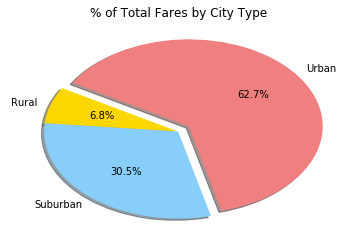

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

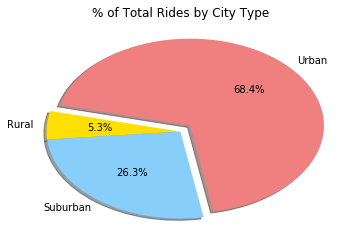

In [15]:
# Calculate Ride Percents
sizes = [len(pyber_urban.index), len(pyber_rural.index), len(pyber_suburban.index)] 

# Build Pie Chart
fig, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
ax2.set_aspect(0.65)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("images/PyberPie_TotalRides.png")

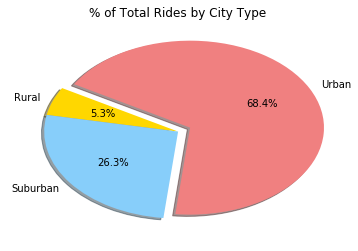

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

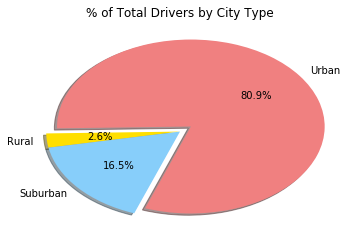

In [17]:
# Calculate Driver Percents
driver_urban = pyber_urban.drop_duplicates(subset='city', keep='first')
driver_suburban = pyber_suburban.drop_duplicates(subset='city', keep='first')
driver_rural = pyber_rural.drop_duplicates(subset='city', keep='first')

# Build Pie Charts
sizes = [driver_urban['driver_count'].sum(), driver_rural['driver_count'].sum(), driver_suburban['driver_count'].sum()]

fig, ax3 = plt.subplots()
ax3.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)
ax3.set_aspect(0.65)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("images/PyberPie_TotalDrivers.png")

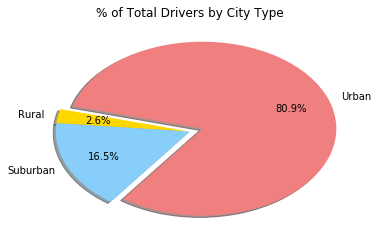

In [6]:
# Show Figure
plt.show()